### Project Objective

The objective of this project is to develop and evaluate various machine learning models for sentiment analysis of hotel reviews. By applying different classification techniques, the aim is to identify the most accurate model for predicting the sentiment of customer feedback. The project involves:

1. **Data Collection and Preparation:**
   - Gathering relevant hotel review data.
   - Cleaning and preprocessing the data to ensure quality and consistency.
   - Labeling the sentiment of each review as positive, neutral, or negative based on the overall rating.

2. **Model Development:**
   - Implementing various classification models including Naive Bayes, Support Vector Machines (SVM), Logistic Regression, Random Forest, and K-Nearest Neighbors (KNN).
   - Transforming textual data into numerical features using techniques like TF-IDF vectorization.

3. **Model Evaluation:**
   - Evaluating each model based on accuracy, precision, recall, and F1-score metrics.
   - Generating confusion matrices to visualize model performance across different sentiment classes.
   - Comparing model performance to identify the best-performing model.

4. **Optimization and Tuning:**
   - Tuning hyperparameters of each model to improve classification performance.
   - Conducting cross-validation to ensure robustness and generalization of the models.

5. **Reporting Results:**
   - Presenting the findings with clear metrics and visualizations.
   - Discussing the effectiveness of each model and suggesting potential improvements or further steps.

The ultimate goal is to determine which classification approach provides the most accurate sentiment predictions for hotel reviews and to use this information to enhance customer feedback analysis in the hospitality industry.


## "TripAdvisor Hotel Reviews" Dataset

The "TripAdvisor Hotel Reviews" dataset contains information about customer feedback on various hotels. The data includes details on the hotel's service, cleanliness, and overall rating, as well as metadata related to the review itself. 

##### Below is a general explanation of each of the variables in the dataset to be analyzed:

Columns definition:
- **ratings** - A dictionary containing various ratings for the hotel:
  - `service` - Rating for the service provided, on a scale from 1 to 5.
  - `cleanliness` - Rating for the cleanliness of the hotel, on a scale from 1 to 5.
  - `overall` - Overall rating of the hotel, on a scale from 1 to 5.
- **title** - Title of the review provided by the customer.
- **text** - Full text of the review given by the customer.
- **author** - A dictionary with information about the reviewer:
  - `username` - Username of the reviewer.
  - `num_cities` - Number of cities visited by the reviewer.
  - `num_reviews` - Number of reviews written by the reviewer.
- **date_stayed** - The month and year when the customer stayed at the hotel.
- **offering_id** - Unique identifier for the hotel or room offering.
- **num_helpful_votes** - Number of helpful votes received for the review.
- **date** - Date when the review was posted.
- **id** - Unique identifier for each review.
- **via_mobile** - A boolean indicating whether the review was submitted via mobile device (`True` for mobile, `False` otherwise).


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lukaszsygula/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lukaszsygula/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df = pd.read_csv('Desktop/reviews.csv')
df = df.sample(frac=0.01, random_state=42)

In [4]:
df.head()

,ratings,title,text,author,date_stayed,offering_id,num_helpful_votes,date,id,via_mobile
340013,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“Very nice experience for a country boy going ...,"Being from a small town in Tennessee, I was ve...","{'username': 'Tucker124', 'num_reviews': 1, 'i...",October 2010,111492,2,2010-10-25,84800976,False
477333,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“Great Courtyard”,I stayed at this courtyard for 2 nights . Ever...,"{'username': 'bimbotrip', 'num_reviews': 1, 'i...",October 2009,108562,0,2009-10-14,46861760,False
755575,"{'service': 2.0, 'cleanliness': 3.0, 'overall'...","“Location, location, location!”",Even in Boston for $180 plus taxes per night y...,"{'username': 'marknthedark', 'num_cities': 17,...",September 2007,94354,1,2007-10-20,10172355,False
709674,"{'service': 2.0, 'cleanliness': 2.0, 'overall'...","“This place is run down, not taken care of at ...",This hotel is a great old building (formerly t...,"{'username': 'Largeandy', 'num_cities': 16, 'n...",February 2012,98798,2,2012-02-09,124329781,False
799143,"{'service': 2.0, 'cleanliness': 2.0, 'overall'...","“The good, the bad and the ugly.”","The Good~room was larger than expected, free i...","{'username': 'bigdog717', 'num_cities': 2, 'nu...",July 2010,93889,0,2010-07-06,69904714,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8786 entries, 340013 to 189080
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ratings            8786 non-null   object
 1   title              8786 non-null   object
 2   text               8786 non-null   object
 3   author             8786 non-null   object
 4   date_stayed        8128 non-null   object
 5   offering_id        8786 non-null   int64 
 6   num_helpful_votes  8786 non-null   int64 
 7   date               8786 non-null   object
 8   id                 8786 non-null   int64 
 9   via_mobile         8786 non-null   bool  
dtypes: bool(1), int64(3), object(6)
memory usage: 695.0+ KB


In [6]:
df.describe()

,offering_id,num_helpful_votes,id
count,8.786000e+03,8786.000000,8.786000e+03
mean,3.010436e+05,1.130776,8.559823e+07
std,4.358950e+05,2.355795,5.012062e+07
min,7.257200e+04,0.000000,6.101660e+05
25%,9.097300e+04,0.000000,3.331775e+07
50%,1.114160e+05,0.000000,1.098008e+08
75%,2.399070e+05,1.000000,1.280653e+08
max,3.235844e+06,47.000000,1.477599e+08


#### Data Cleaning and Preprocessing

In [7]:
df.isnull().sum()

ratings                0
title                  0
text                   0
author                 0
date_stayed          658
offering_id            0
num_helpful_votes      0
date                   0
id                     0
via_mobile             0
dtype: int64

In [8]:
df.drop(columns=['id'], inplace=True)

In [9]:
df.dropna(subset=['date_stayed'], inplace=True)

In [10]:
df.head()

,ratings,title,text,author,date_stayed,offering_id,num_helpful_votes,date,via_mobile
340013,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“Very nice experience for a country boy going ...,"Being from a small town in Tennessee, I was ve...","{'username': 'Tucker124', 'num_reviews': 1, 'i...",October 2010,111492,2,2010-10-25,False
477333,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“Great Courtyard”,I stayed at this courtyard for 2 nights . Ever...,"{'username': 'bimbotrip', 'num_reviews': 1, 'i...",October 2009,108562,0,2009-10-14,False
755575,"{'service': 2.0, 'cleanliness': 3.0, 'overall'...","“Location, location, location!”",Even in Boston for $180 plus taxes per night y...,"{'username': 'marknthedark', 'num_cities': 17,...",September 2007,94354,1,2007-10-20,False
709674,"{'service': 2.0, 'cleanliness': 2.0, 'overall'...","“This place is run down, not taken care of at ...",This hotel is a great old building (formerly t...,"{'username': 'Largeandy', 'num_cities': 16, 'n...",February 2012,98798,2,2012-02-09,False
799143,"{'service': 2.0, 'cleanliness': 2.0, 'overall'...","“The good, the bad and the ugly.”","The Good~room was larger than expected, free i...","{'username': 'bigdog717', 'num_cities': 2, 'nu...",July 2010,93889,0,2010-07-06,False


In [11]:
df['author'] = df['author'].astype('category')
df['date_stayed'] = pd.to_datetime(df['date_stayed'], errors = 'coerce')
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month

/var/folders/6m/gmf8c68160sdfzdqsl09tfp80000gn/T/ipykernel_780/953712247.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_stayed'] = pd.to_datetime(df['date_stayed'], errors = 'coerce')


In [12]:
print(df.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
Index: 8128 entries, 340013 to 189080
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ratings            8128 non-null   object        
 1   title              8128 non-null   object        
 2   text               8128 non-null   object        
 3   author             8128 non-null   category      
 4   date_stayed        8128 non-null   datetime64[ns]
 5   offering_id        8128 non-null   int64         
 6   num_helpful_votes  8128 non-null   int64         
 7   date               8128 non-null   datetime64[ns]
 8   via_mobile         8128 non-null   bool          
 9   month              8128 non-null   int32         
dtypes: bool(1), category(1), datetime64[ns](2), int32(1), int64(2), object(3)
memory usage: 11.8 MB
None


#### Classifies sentiment based on the 'overall' rating in the dictionary

In [13]:
def get_sentiment(ratings):
    overall_rating = ratings.get('overall')
    if overall_rating >= 4:
        return 'positive'
    elif overall_rating == 3:
        return 'neutral'
    else:
        return 'negative'    

In [14]:
df['sentiment'] = df['ratings'].apply(eval).apply(get_sentiment)

In [15]:
sentiment_counts = df['sentiment'].value_counts()

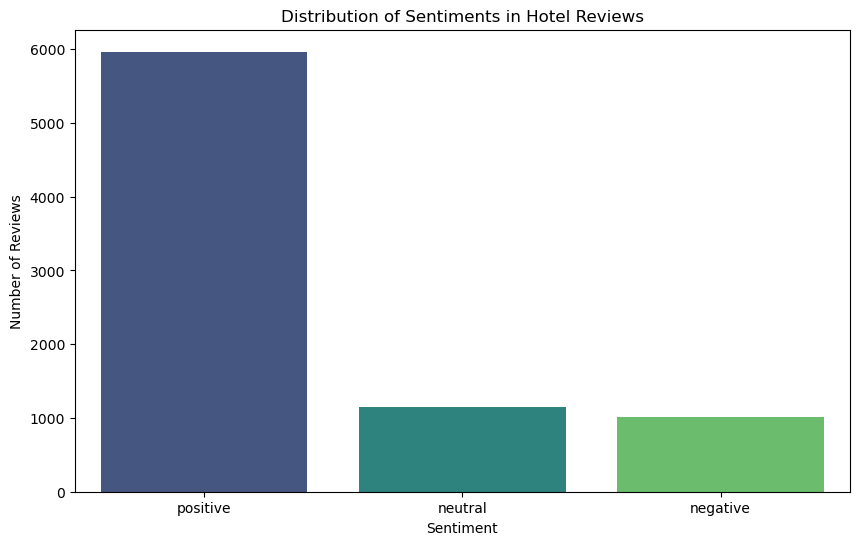

In [16]:
plt.figure(figsize=(10, 6))

sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')

plt.title('Distribution of Sentiments in Hotel Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')

plt.show()

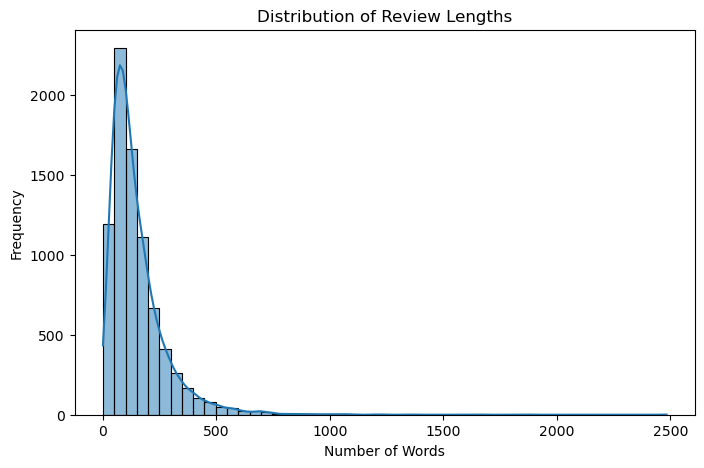

In [17]:
df['text_length'] = df['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 5))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

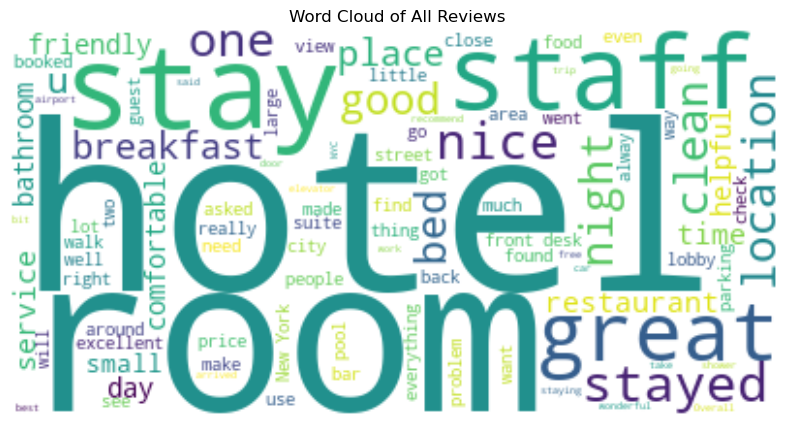

In [18]:
from wordcloud import WordCloud

all_reviews = ' '.join(df['text'])
wordcloud = WordCloud(max_words=100, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Reviews')
plt.show()

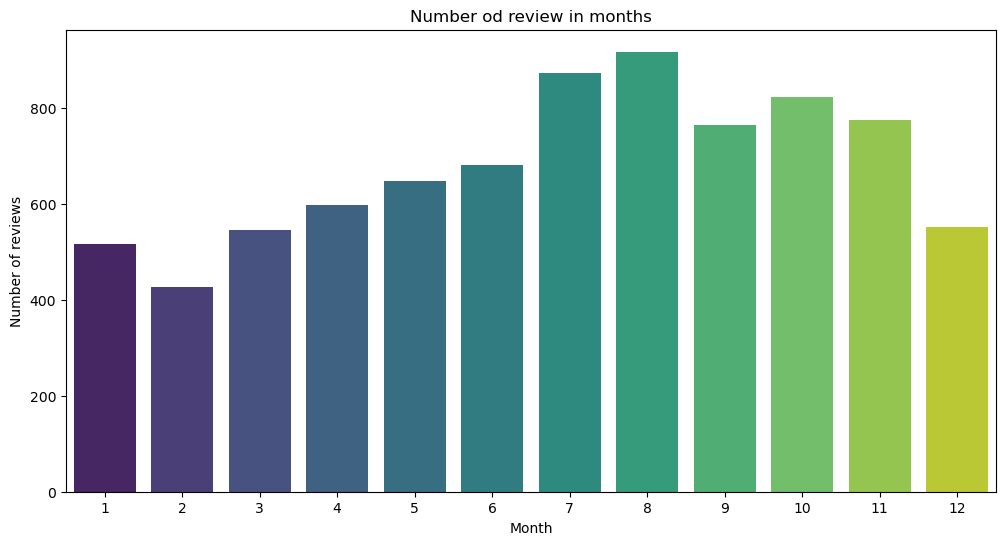

In [19]:
plt.figure(figsize=(12, 6))

sns.countplot(x='month', data=df, palette='viridis')
plt.title('Number od review in months')
plt.xlabel('Month')
plt.ylabel('Number of reviews')

plt.show()

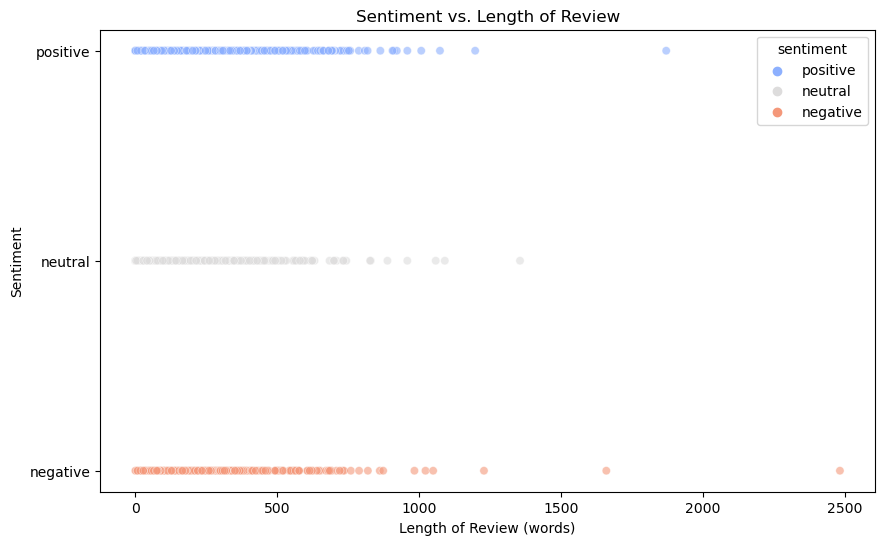

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='text_length', y='sentiment', data=df, hue='sentiment', palette='coolwarm', alpha=0.6)
plt.title('Sentiment vs. Length of Review')
plt.xlabel('Length of Review (words)')
plt.ylabel('Sentiment')
plt.show()

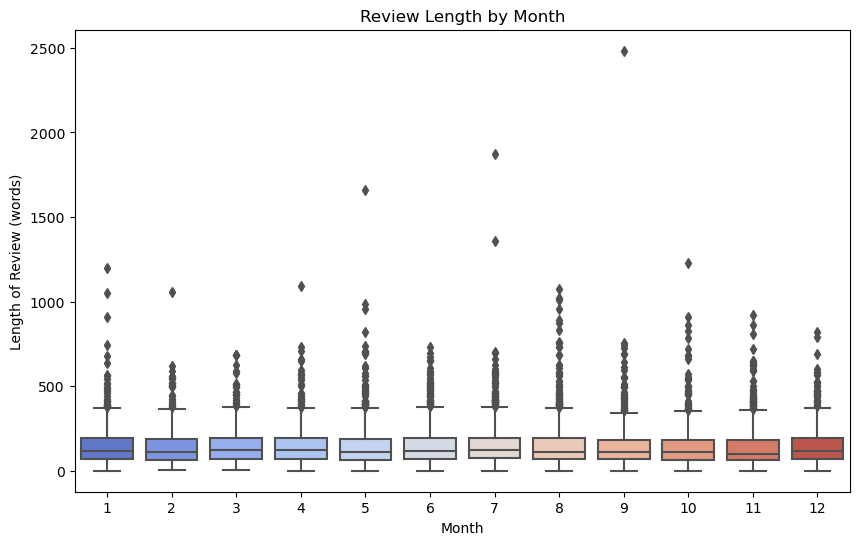

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='text_length', data=df, palette='coolwarm')
plt.title('Review Length by Month')
plt.xlabel('Month')
plt.ylabel('Length of Review (words)')
plt.show()

In [22]:
def categorize_length(length):
    if length <= 50:
        return 'Short'
    elif length <= 200:
        return 'Medium'
    else:
        return 'Long'

In [23]:
df['length_category'] = df['text_length'].apply(categorize_length)

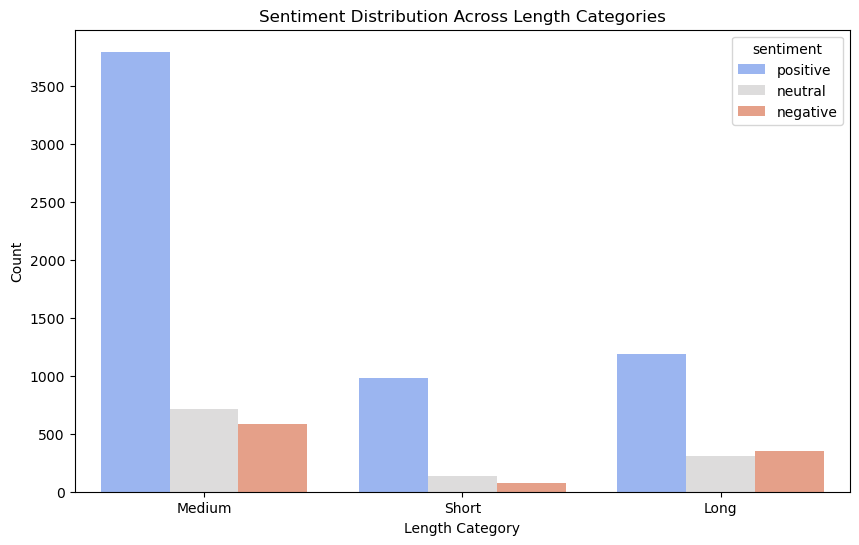

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='length_category', hue='sentiment', data=df, palette='coolwarm')
plt.title('Sentiment Distribution Across Length Categories')
plt.xlabel('Length Category')
plt.ylabel('Count')
plt.show()

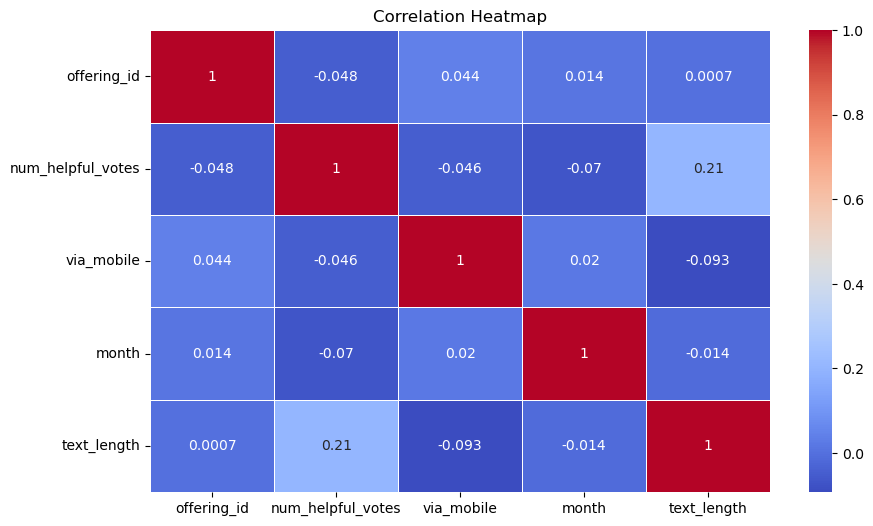

In [25]:
plt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#### Feature Extraction

In [26]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

In [27]:
df['cleaned_text'] = df['text'].apply(preprocess_text)

In [28]:
df[['text', 'cleaned_text']].head()

,text,cleaned_text
340013,"Being from a small town in Tennessee, I was ve...",small town tennessee unsure expect large city ...
477333,I stayed at this courtyard for 2 nights . Ever...,stayed courtyard night everything great staff ...
755575,Even in Boston for $180 plus taxes per night y...,even boston plus tax per night might expect be...
709674,This hotel is a great old building (formerly t...,hotel great old building formerly paso del nor...
799143,"The Good~room was larger than expected, free i...",goodroom larger expected free internet room ba...


In [29]:
tfidf = TfidfVectorizer(max_features=1000)

In [30]:
X = tfidf.fit_transform(df['cleaned_text']).toarray()
y = df['sentiment']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Model Development and Evaluation

In [32]:
models = {
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"{name} Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

Naive Bayes Accuracy: 0.7785977859778598
Naive Bayes Classification Report:
              precision    recall  f1-score   support

    negative       0.82      0.41      0.55       194
     neutral       0.67      0.02      0.03       245
    positive       0.78      1.00      0.87      1187

    accuracy                           0.78      1626
   macro avg       0.76      0.47      0.48      1626
weighted avg       0.77      0.78      0.71      1626

Naive Bayes Confusion Matrix:
[[  80    2  112]
 [  12    4  229]
 [   5    0 1182]]

SVM Accuracy: 0.7988929889298892
SVM Classification Report:
              precision    recall  f1-score   support

    negative       0.76      0.54      0.63       194
     neutral       0.49      0.12      0.19       245
    positive       0.82      0.98      0.89      1187

    accuracy                           0.80      1626
   macro avg       0.69      0.55      0.57      1626
weighted avg       0.76      0.80      0.75      1626

SVM Confusion Ma

In [33]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid_search.fit(X_train, y_train)

print(f"Best Parameters for SVM: {grid_search.best_params_}")
best_svm = grid_search.best_estimator_
y_pred_best_svm = best_svm.predict(X_test)

print(f"Best SVM Accuracy: {accuracy_score(y_test, y_pred_best_svm)}")
print(f"Best SVM Classification Report:\n{classification_report(y_test, y_pred_best_svm)}")
print(f"Best SVM Confusion Matrix:\n{confusion_matrix(y_test, y_pred_best_svm)}\n")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  18.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  17.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  17.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  17.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  17.4s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=  12.6s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=  12.7s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=  12.7s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=  12.5s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=  12.8s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  14.7s
[CV] END .......................C=0.1, gamma=0.

[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=  13.8s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=  13.7s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=  13.6s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=  13.6s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=  10.0s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=  10.4s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=  10.2s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=  10.3s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=  10.1s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=  14.7s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=  14.8s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=  14.7s
[CV] END ...................

In [34]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print(f"Best Random Forest Accuracy: {accuracy_score(y_test, y_pred_best_rf)}")
print(f"Best Random Forest Classification Report:\n{classification_report(y_test, y_pred_best_rf)}")
print(f"Best Random Forest Confusion Matrix:\n{confusion_matrix(y_test, y_pred_best_rf)}\n")

Best Random Forest Accuracy: 0.7595325953259533
Best Random Forest Classification Report:
              precision    recall  f1-score   support

    negative       0.89      0.26      0.40       194
     neutral       0.00      0.00      0.00       245
    positive       0.76      1.00      0.86      1187

    accuracy                           0.76      1626
   macro avg       0.55      0.42      0.42      1626
weighted avg       0.66      0.76      0.68      1626

Best Random Forest Confusion Matrix:
[[  50    0  144]
 [   5    0  240]
 [   1    1 1185]]



#### Confusion matrices for the best models

In [35]:
def plot_confusion_matrix(cm, class_names, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

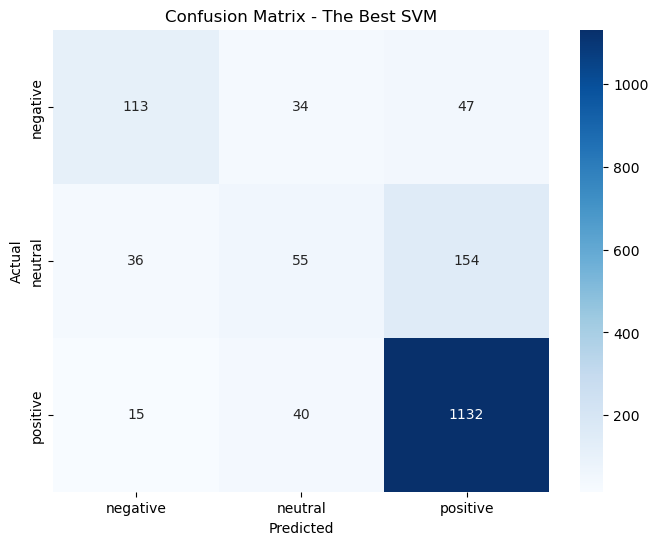

In [36]:
cm_svm = confusion_matrix(y_test, y_pred_best_svm, labels=best_svm.classes_)
plot_confusion_matrix(cm_svm, best_svm.classes_, 'The Best SVM')

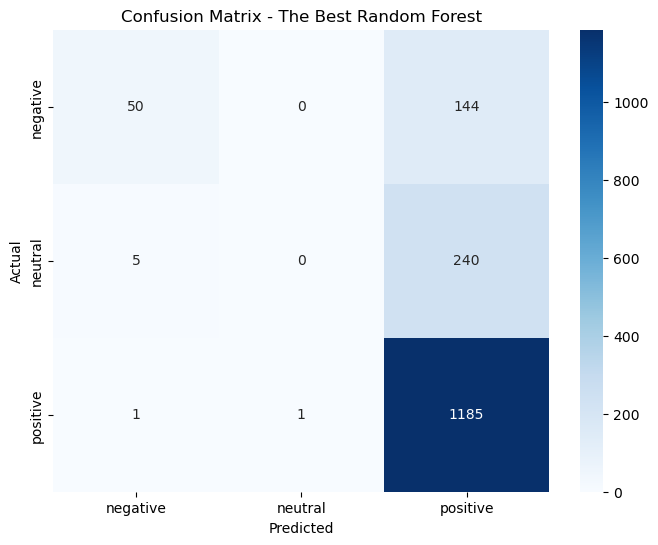

In [37]:
cm_rf = confusion_matrix(y_test, y_pred_best_rf, labels=best_rf.classes_)
plot_confusion_matrix(cm_rf, best_rf.classes_, 'The Best Random Forest')

<Figure size 1000x600 with 0 Axes>

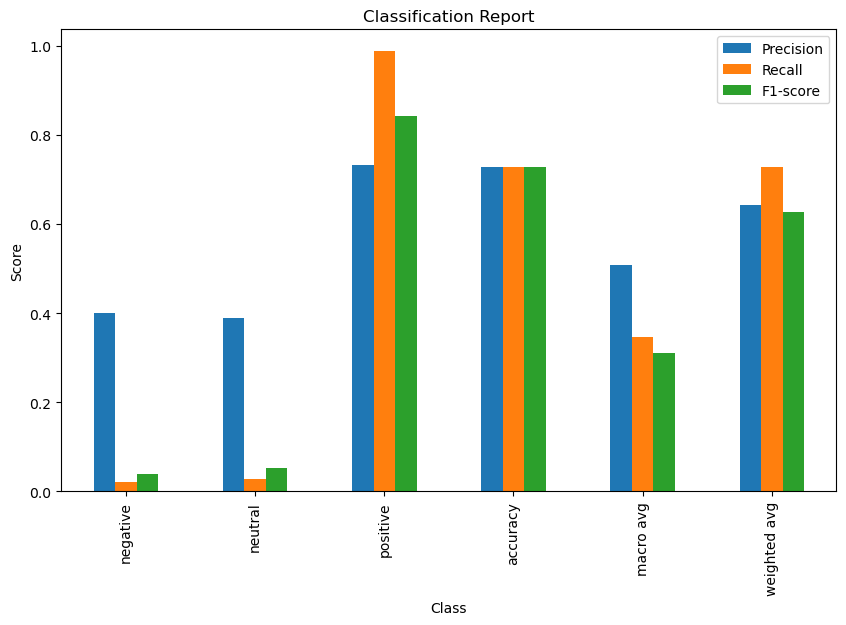

In [38]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
df_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report')
plt.xlabel('Class')
plt.ylabel('Score')
plt.legend(['Precision', 'Recall', 'F1-score'])
plt.show()

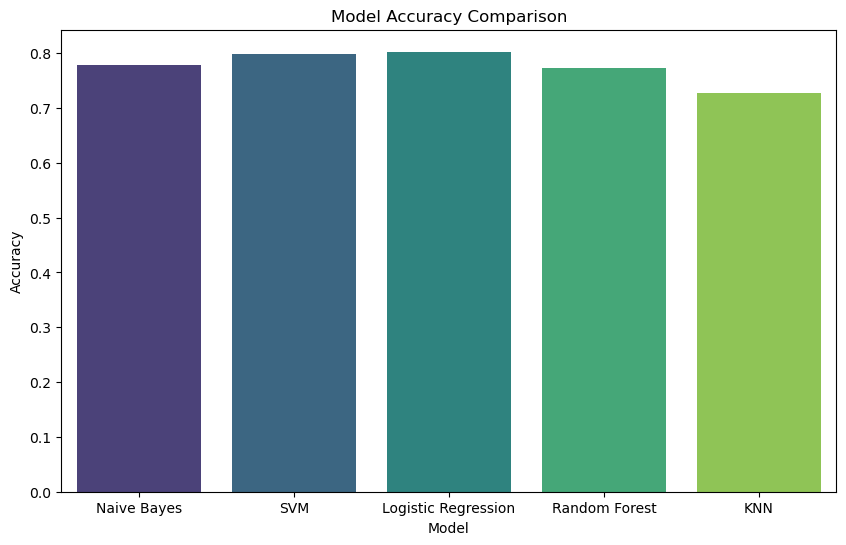

In [39]:
accuracy_scores = {name: accuracy_score(y_test, model.predict(X_test)) for name, model in models.items()}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

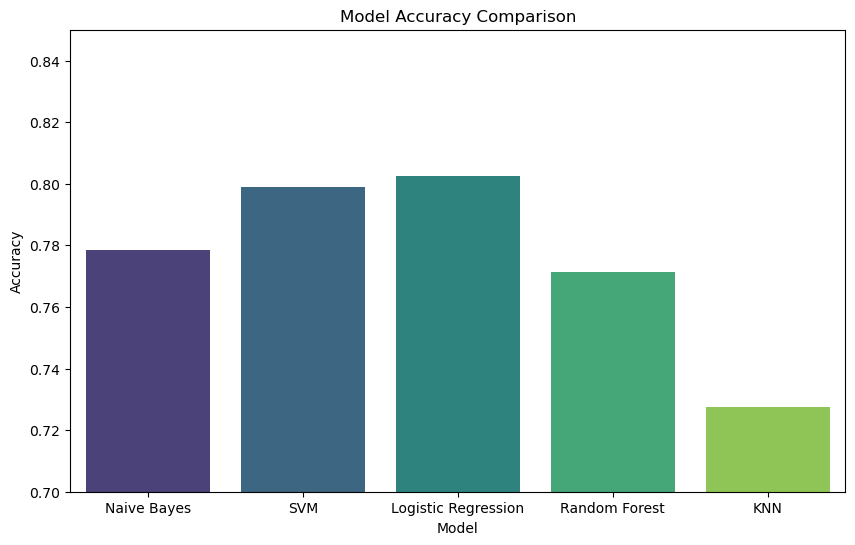

In [40]:
accuracy_scores = {
    'Naive Bayes': 0.7786,
    'SVM': 0.7989,
    'Logistic Regression': 0.8026,
    'Random Forest': 0.7712,
    'KNN': 0.7276
}

models_metrics = {
    'Naive Bayes': {
        'precision': [0.82, 0.67, 0.78],
        'recall': [0.41, 0.02, 1.00],
        'f1-score': [0.55, 0.03, 0.87]
    },
    'SVM': {
        'precision': [0.76, 0.49, 0.82],
        'recall': [0.54, 0.12, 0.98],
        'f1-score': [0.63, 0.19, 0.89]
    },
    'Logistic Regression': {
        'precision': [0.76, 0.48, 0.83],
        'recall': [0.53, 0.20, 0.97],
        'f1-score': [0.62, 0.28, 0.90]
    },
    'Random Forest': {
        'precision': [0.86, 0.46, 0.77],
        'recall': [0.35, 0.02, 0.99],
        'f1-score': [0.49, 0.05, 0.87]
    },
    'KNN': {
        'precision': [0.40, 0.39, 0.73],
        'recall': [0.02, 0.03, 0.99],
        'f1-score': [0.04, 0.05, 0.84]
    }
}

classes = ['negative', 'neutral', 'positive']
metrics = ['precision', 'recall', 'f1-score']


plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.7, 0.85)
plt.show()

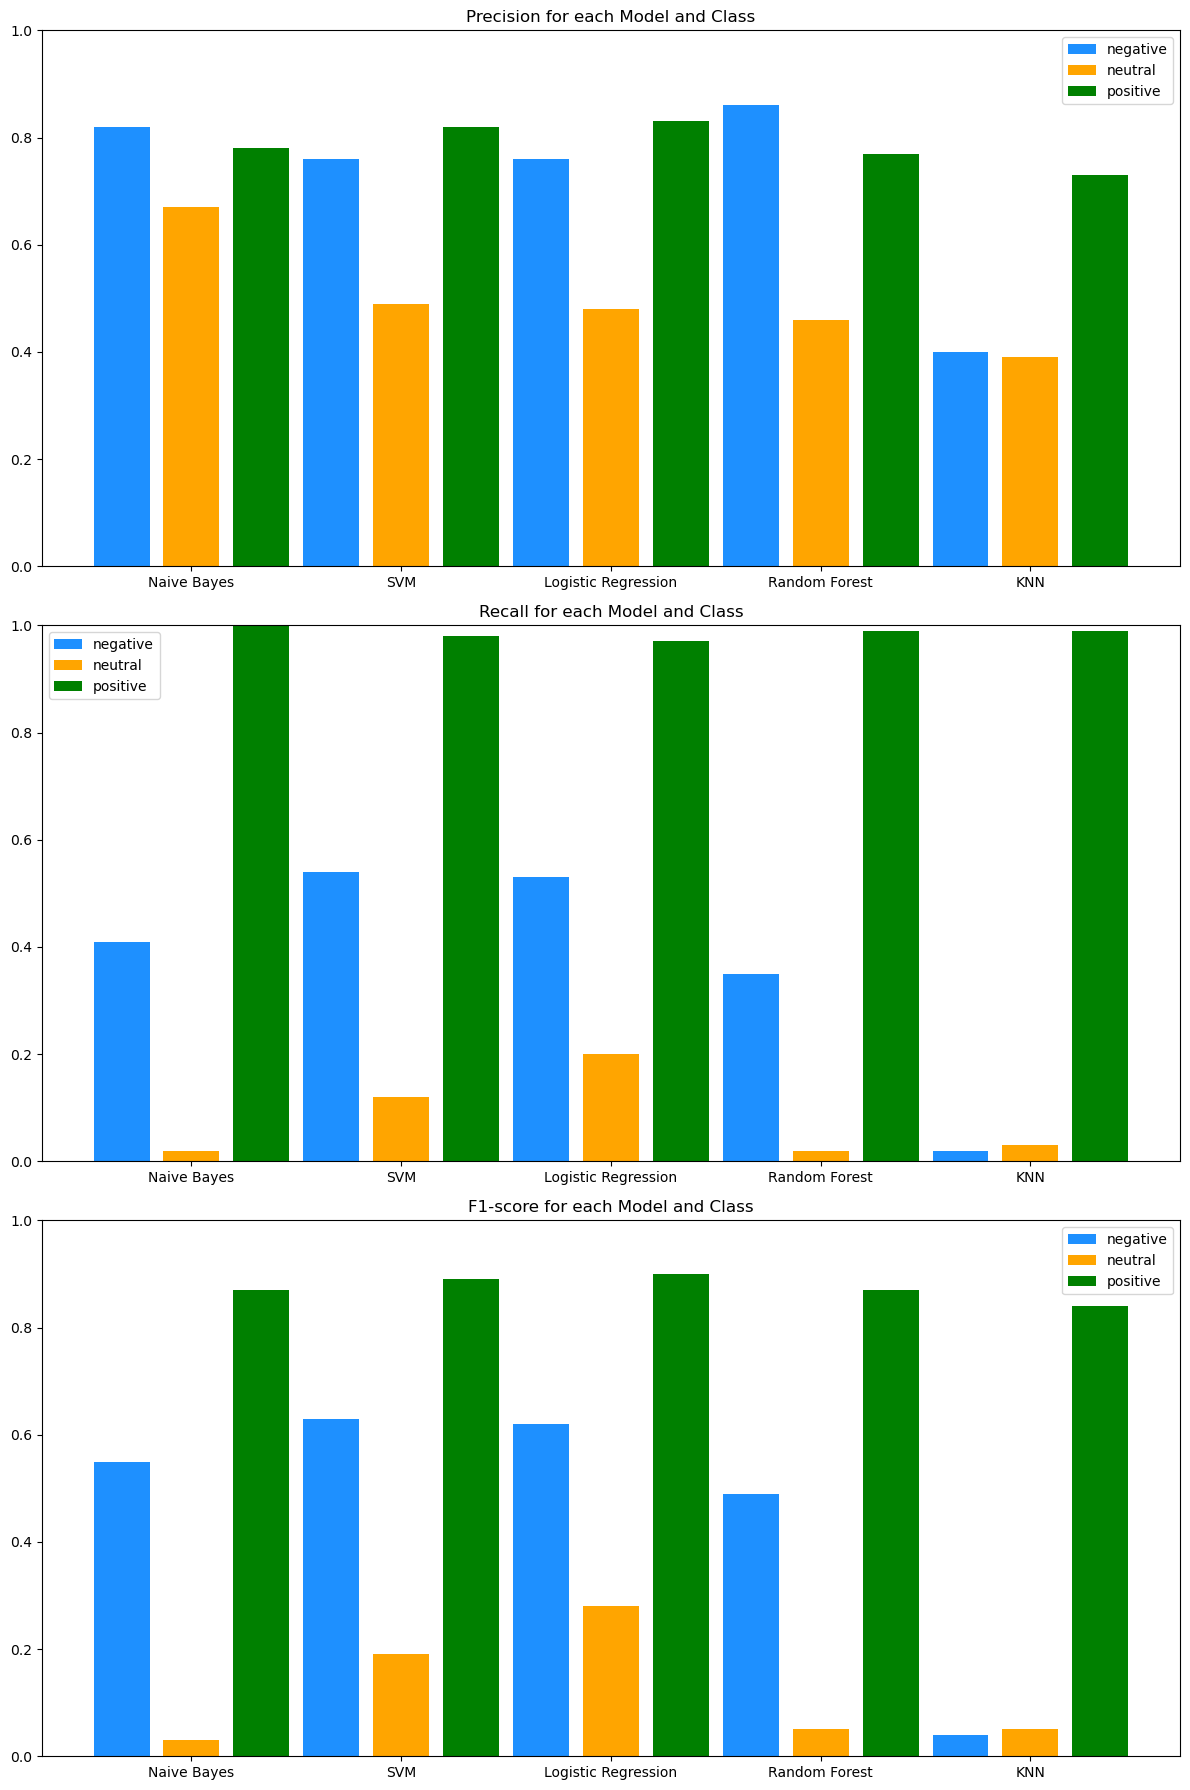

In [41]:
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

for i, metric in enumerate(metrics):
    metric_data = [models_metrics[model][metric] for model in models_metrics]
    metric_data = np.array(metric_data).T
    
    axs[i].bar(np.arange(len(models_metrics))*3, metric_data[0], width=0.8, label=classes[0], color='dodgerblue')
    axs[i].bar(np.arange(len(models_metrics))*3 + 1, metric_data[1], width=0.8, label=classes[1], color='orange')
    axs[i].bar(np.arange(len(models_metrics))*3 + 2, metric_data[2], width=0.8, label=classes[2], color='green')
    
    axs[i].set_title(f'{metric.capitalize()} for each Model and Class')
    axs[i].set_xticks(np.arange(len(models_metrics))*3 + 1)
    axs[i].set_xticklabels(list(models_metrics.keys()))
    axs[i].set_ylim(0, 1)
    axs[i].legend()

plt.tight_layout()
plt.show()

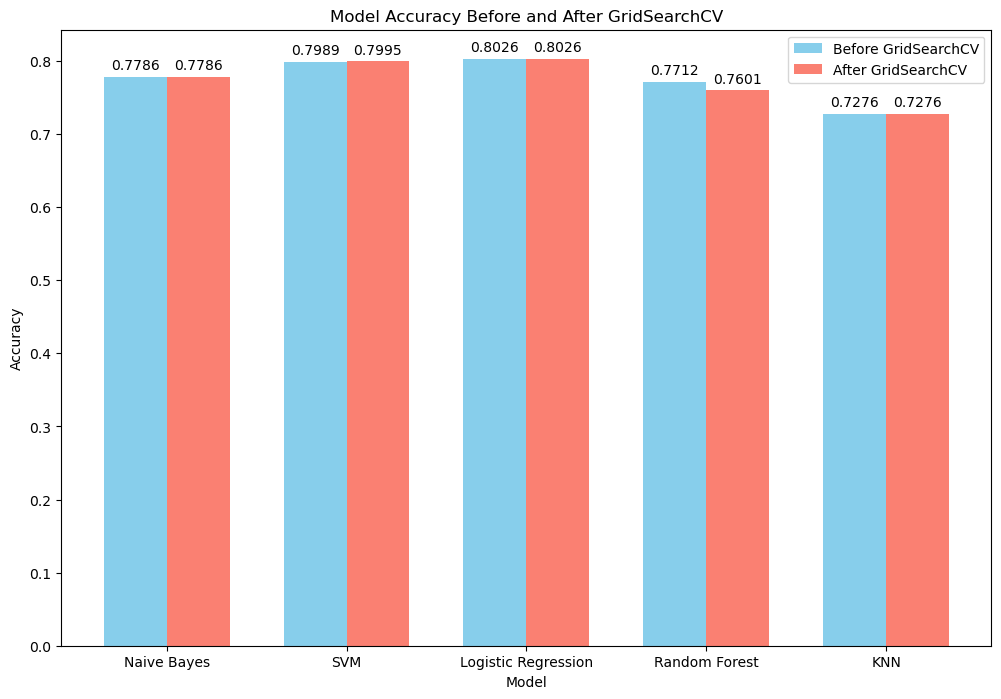

In [42]:
accuracy_before = {
    'Naive Bayes': 0.7786,
    'SVM': 0.7989,
    'Logistic Regression': 0.8026,
    'Random Forest': 0.7712,
    'KNN': 0.7276
}

accuracy_after = {
    'Naive Bayes': 0.7786,
    'SVM': 0.7995,
    'Logistic Regression': 0.8026, 
    'Random Forest': 0.7601,
    'KNN': 0.7276 
}

labels = list(accuracy_before.keys())
before_means = [accuracy_before[label] for label in labels]
after_means = [accuracy_after[label] for label in labels]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 8))
bars_before = ax.bar(x - width/2, before_means, width, label='Before GridSearchCV', color='skyblue')
bars_after = ax.bar(x + width/2, after_means, width, label='After GridSearchCV', color='salmon')

ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Before and After GridSearchCV')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def add_values(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')

add_values(bars_before)
add_values(bars_after)

plt.show()

## Conclusions

### Best Model
- **Logistic Regression** achieved the highest accuracy at **80.26%**, making it the best model. It also performed well in precision, recall, and F1-score for the 'positive' class.

### Model Comparison
- **SVM** had an accuracy of **79.89%**, solid but slightly worse than Logistic Regression.
- **Random Forest** achieved **77.12%** accuracy, performing well in 'negative' classification but not as strong as SVM and Logistic Regression.
- **Naive Bayes** and **KNN** had the lowest accuracies (**77.86%** and **72.76%**), struggling particularly with the 'neutral' class.

### Error Analysis and Model Improvement
- **Error Issues:** Naive Bayes and KNN struggle with 'neutral' reviews, indicating they may not capture subtle nuances effectively.
- **Optimization:** GridSearchCV significantly improved SVM and Random Forest, highlighting the importance of hyperparameter tuning for enhancing model performance.

In summary, Logistic Regression is currently the best model, but there is potential for further improvement in sentiment analysis through more advanced techniques and additional research.

